# Support Vector Machines más complejas.

Como adelantamos en el apartado anterior, hay datasets muy fáciles de separar con una línea, pero luego hay otros que son más complicadas una separación lineal entre clases.

Ejemplo de clase linealmente dificil de separar.

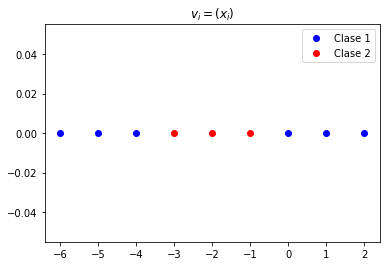

In [3]:
from utilidad import ejemplo_nolineal

ejemplo_nolineal()

Mediante modificaciones en el dataset se podrían llegar a modelos linealmente separables.

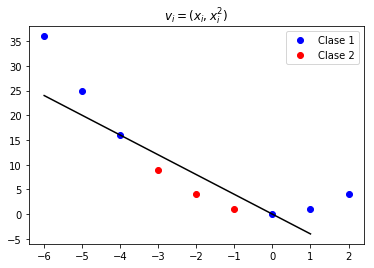

In [2]:
from utilidad import ejemplo_solnolineal

ejemplo_solnolineal()

Existen modelos más complejos que el propuesto, como este por ejemplo:

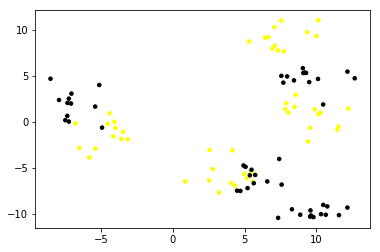

In [2]:
from utilidad import ejemplo_mascomplejo

ejemplo_mascomplejo()

Como podemos ver, este dataset es claramente no-linealmente separable. Además vemos que no es posible recurrir a algo como lo realizado en el ejemplo anterior.<br>
Para paliar esta desventaja, se emplean otros sistemas de SVM. En nuestro caso usaremos las Kernelized SVM o KSVM.

Dentro de los mismos, se encuentra el método conocido como Radial Basis Function Kernel(RBFK). Cuya fórmula es:<br>
\begin{equation*}
    K(x,x')=e^{-\gamma||x-x'||^2}
\end{equation*}<br>
$\textbf{Parámetro Gamma}$: Como podemos intuir, el parámetro $\gamma$ es la anchura del kernel.<br>
$||x-x'||^2$: Distancia cuadrática entre x y x'.

Como lógicamente podemos intuir, una mayor $\gamma$ dará lugar a una menor distancia cuadrática entre los puntos x x' (atención con el operador - de $\gamma$).

Aquí vemos gráficamente como funciona el método RBFK:<br>
<a href="https://imgur.com/rS3rd5i"><img src="https://i.imgur.com/rS3rd5i.png" title="source: imgur.com" /></a>

Veamos algunos ejemplos. Veamos primero los datos sobre los que trabajaremos.

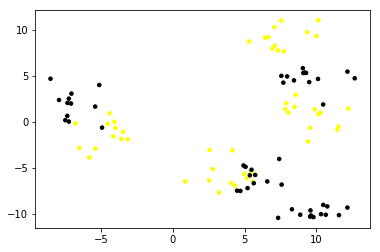

In [20]:
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cmap_bold=ListedColormap(['#FFFF00','#00FF00','#0000FF','#000000'])

X,y=make_blobs(n_samples=100,n_features=2,centers=8,cluster_std=1.3,random_state=4)
y=y%2

plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,marker='.',s=50,cmap=cmap_bold)

C:\Users\jlxdp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


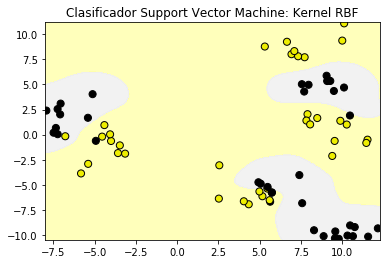

Precisión kernel rbf:
Precisión con train: 0.92
Precisión con test: 0.76


C:\Users\jlxdp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jlxdp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jlxdp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


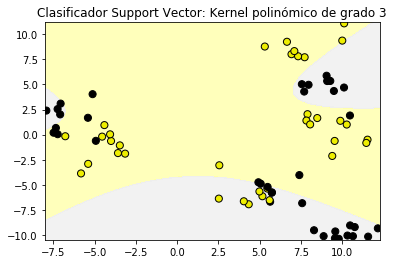

Precisión Kernel polinómico de grado 3:


C:\Users\jlxdp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Precisión con train: 0.76


C:\Users\jlxdp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Precisión con test: 0.84


In [26]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

plot_class_regions_for_classifier(SVC(kernel='rbf').fit(X_train,y_train),X_train,y_train,None,None,
                                  'Clasificador Support Vector Machine: Kernel RBF')
print('Precisión kernel rbf:')
print('Precisión con train: {}'.format(SVC(kernel='rbf').fit(X_train,y_train).score(X_train,y_train)))
print('Precisión con test: {}'.format(SVC(kernel='rbf').fit(X_train,y_train).score(X_test,y_test)))

plot_class_regions_for_classifier(SVC(kernel='poly',degree=3).fit(X_train,y_train),X_train,y_train,None,None,
                                  'Clasificador Support Vector: Kernel polinómico de grado 3')

print('Precisión Kernel polinómico de grado 3:')
print('Precisión con train: {}'.format(SVC(kernel='poly',degree=3).fit(X_train,y_train).score(X_train,y_train)))
print('Precisión con test: {}'.format(SVC(kernel='poly',degree=3).fit(X_train,y_train).score(X_test,y_test)))

Veamos la influencia del parámetro de regularización.

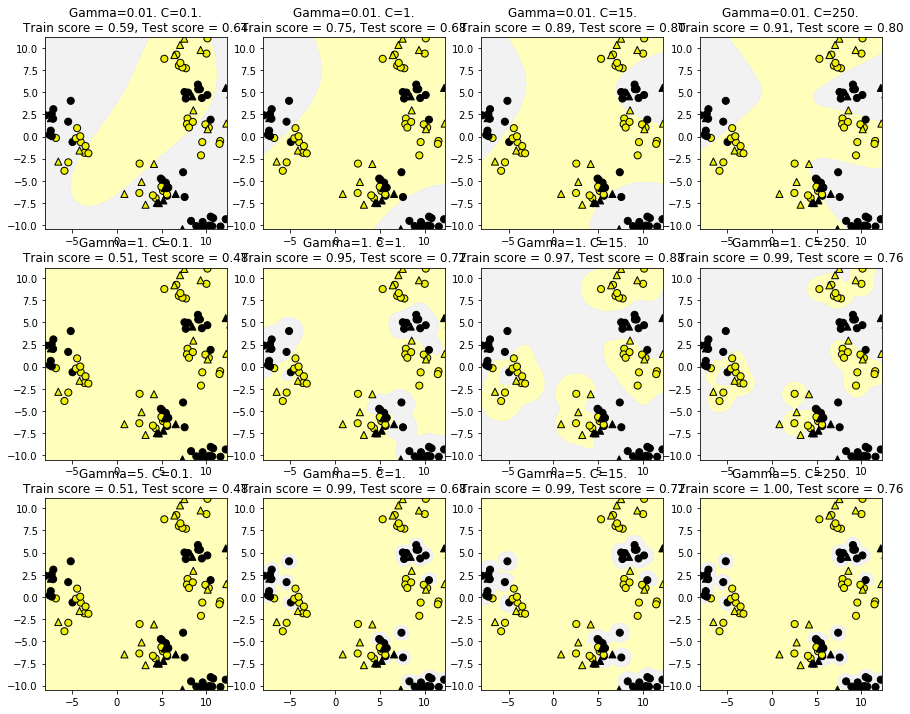

In [29]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

fig,subaxes=plt.subplots(3,4,figsize=(15,12))

for this_gamma, this_axis in zip([0.01,1,5],subaxes):
    for this_C, subplot in zip([0.1,1,15,250],this_axis):
        title=('Gamma={}. C={}.'.format(this_gamma,this_C))
        svm=SVC(kernel='rbf',gamma=this_gamma,C=this_C).fit(X_train,y_train)
        plot_class_regions_for_classifier_subplot(svm,X_train,y_train,X_test,y_test,title,subplot)

Con una buena normalización se pueden obtener mejores resultados.

$\textbf{IMPORTANTE}$: El parámetro $\gamma$ es el parámetro de regularización del rfb referente a la anchura, mientras que C es el parámetro de regularización del modelo.

Como ventajas este modelo tiene:<br>
* Funciona muy bien en un rango de dataset.<br>
* Muy versátil.<br>

Como desventajas este modelo tiene:<br>
* La eficiencia desciende cuando el dataset se agranda.<br>
* Necesita una buena normalización y elección de parámetros.<br>
* Difícil de intrepretar.<br>